In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


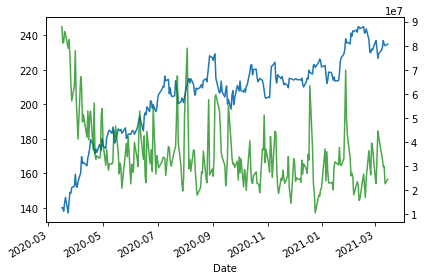

In [103]:
#df=pd.read_csv('GOOG.csv')
#df=pd.read_csv('nflx.csv')
#df=pd.read_csv('nio.csv')
#df=pd.read_csv('dpz.csv')
#df=pd.read_csv('dis.csv')
#df=pd.read_csv('aapl.csv')
#df=pd.read_csv('VMW.csv')
df=pd.read_csv('MSFT.csv')

df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df=df.sort_values(by='Date',ascending=True)
print(df.columns)
fig,ax=plt.subplots(figsize=(6,4))
df['Open'].plot(ax=ax)
twin_ax=ax.twinx()

df['Volume'].plot(ax=twin_ax, c='green', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [104]:
#df=df.asfreq('B').fillna(0)
#for key, item in df.iterrows():
#    print(key,item)

In [105]:
df['Shifted 1D']=df.Open.shift()
df['Shifted 2D']=df.Open.shift(periods=2)
df['Open_PCT']=df['Open'].pct_change()

df["Buy_Count"]=0

for index in range(len(df)):
    count=0
    for index2 in (range(index,0,-1)):
        if df.iloc[index2]["Open_PCT"]>0:
            count=count+1
        else:
            break
    df.iloc[index, df.columns.get_loc('Buy_Count')]=count
    
df['Action']=[ 'Sell' if x['Buy_Count']==0 else 'Buy' if x['Buy_Count']==2 else 'Hold' if x['Buy_Count'] > 2 else 'No Action' for key,x in df.iterrows()]

df["Target"]=0
for index in range(len(df)):
    action=df.iloc[index]["Action"]
    if (action=='Buy'):
             df.iloc[index, df.columns.get_loc('Target')]=1
    elif (action=='Sell'):
             df.iloc[index, df.columns.get_loc('Target')]=2

print(df[['Target','Action','Open_PCT','Open','Shifted 1D','Shifted 2D','Buy_Count']])



            Target     Action  Open_PCT        Open  Shifted 1D  Shifted 2D  \
Date                                                                          
2020-03-16       2       Sell       NaN  140.000000         NaN         NaN   
2020-03-17       2       Sell  0.000000  140.000000  140.000000         NaN   
2020-03-18       2       Sell -0.014286  138.000000  140.000000  140.000000   
2020-03-19       0  No Action  0.034565  142.770004  138.000000  140.000000   
2020-03-20       1        Buy  0.022624  146.000000  142.770004  138.000000   
...            ...        ...       ...         ...         ...         ...   
2021-03-09       0       Hold  0.006526  232.880005  231.369995  229.520004   
2021-03-10       0       Hold  0.017691  237.000000  232.880005  231.369995   
2021-03-11       2       Sell -0.008608  234.960007  237.000000  232.880005   
2021-03-12       2       Sell -0.004043  234.009995  234.960007  237.000000   
2021-03-15       0  No Action  0.004060  234.960007 

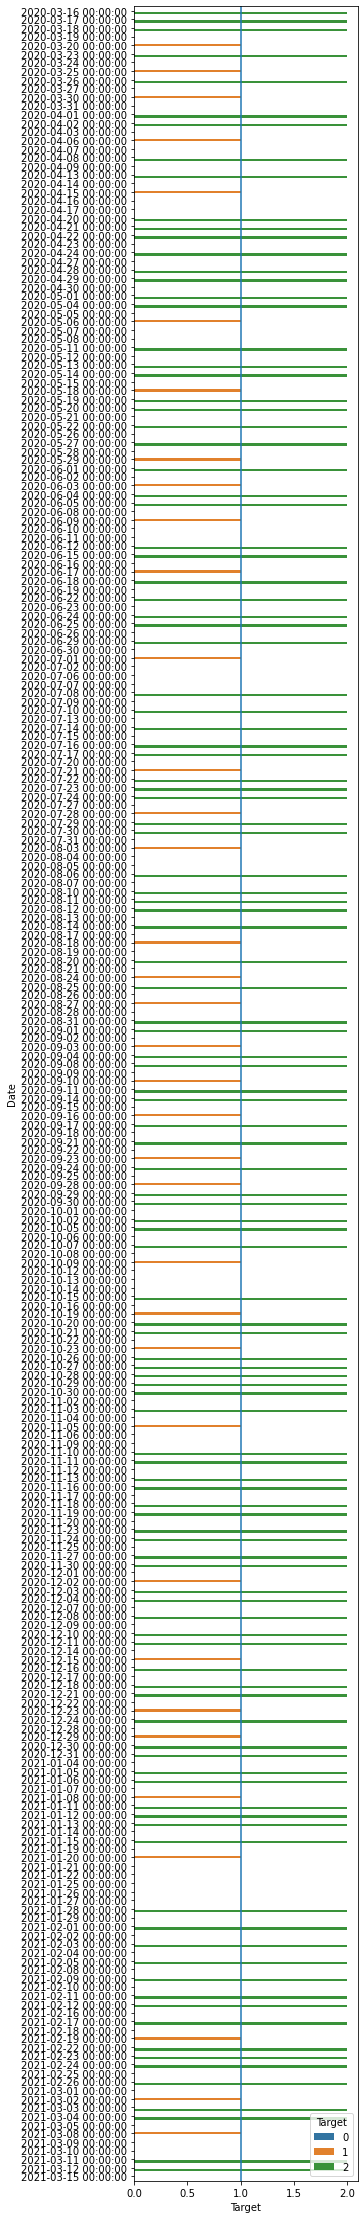

In [106]:
colors=[]
[colors.append('Red') if x=='2' else colors.append('Green') if x==1 else colors.append('White') for x in df['Target']]
plt.figure(figsize=(4, 40))
#names.arg = colors
sns.barplot(data=df, x='Target', y=df.index, hue='Target')
plt.axvline(x=1, ymin=0, ymax=1)
plt.show()

   Buy_Count  Incidence  Size
0          0          2   117
1          1          0    72
2          2          1    36
3          3          0    13
4          4          0     9
5          5          0     3
6          6          0     1
7          7          0     1
Number of Buys in the Data 13
Number of days holding Open          27
High          27
Low           27
Close         27
Adj Close     27
Volume        27
Shifted 1D    27
Shifted 2D    27
Open_PCT      27
Buy_Count     27
Action        27
Target        27
dtype: int64
Incidence shows the average target value for each group


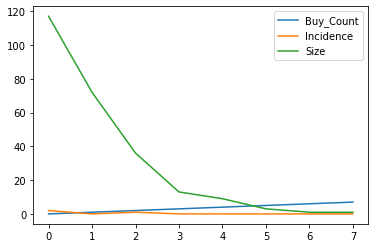

In [107]:
def create_pig_table(basetable, target, variable):
  
    # Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    pig_table=groups[target].agg([np.mean, np.size]).reset_index()
    pig_table=pig_table.rename(columns={'mean':'Incidence','size':'Size'})
    #pig_table = groups[target].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()

    # Return the predictor insight graph table
    return pig_table

pig_table = create_pig_table(df, "Target", "Buy_Count")
print(pig_table)

print("Number of Buys in the Data", len(df[df['Buy_Count']==3]))

print("Number of days holding", df[(df["Action"]=='Hold')].count())

print("Incidence shows the average target value for each group")

pig_table.plot()
plt.show()